# Các mẫu thiết kế : 1) Factory Method

**BS. Lê Ngọc Khả Nhi**


# Giới thiệu

Thông thường, khi muốn viết code thực hiện một công việc nào đó, thí dụ thực hiện một kiểm định thống kê trên dữ liệu, người dùng phải biết chính xác tên của class và method tương ứng với loại kiểm định chuyên biệt đó, thí dụ class Test_A, từ đó mới khởi tạo object test_a = Test_A() sau đó gọi method test_a.fit(data)...

**Factory Method** là một mẫu thiết kế hướng đối tượng thuộc lớp 'Tạo lập' (Creational), cho phép khởi tạo object mà không cần phải chỉ ra trực tiếp và chính xác tên Class dùng để tạo ra object đó.

# Cấu trúc của Factory Method

Mẫu thiết kế Factory Method gồm 2 bộ phận chính như sau:

1) Bộ phận Product (Sản phẩm): gồm giao diện (Product interface ) và class vận dụng giao diện này (concrete Products), bên trong mỗi product có method đảm nhận công việc ta muốn làm.

2) Bộ phận Creator: bao gồm giao diện (interface) chứa factory_method cơ bản, và các concrete Creator, là subclasses cho phép thay đổi factory_method cơ bản để khởi tạo các loại product khác nhau tương ứng với 1 điều kiện nào đó.


# Các bước triển khai

**Bước 1**: Thiết kế giao diện IProduct chung cho tất cả "sản phẩm" bằng abstract meta-class; trong đó khai báo tên các method chính bằng abstract method

**Bước 2**: Thiết kế class riêng biệt cho mỗi "sản phẩm", (Product_A, Product_B, ...) và đảm bảo những class "sản phẩm" này đều vận dụng cùng giao diện IProduct. Bên trong mỗi class sản phẩm, triển khai nội dung method chính.

**Bước 3**: Thiết kế giao diện ICreator cho 1 hay nhiều class Creator, 

**Bước 4**: Thiết kế class Creator, trong đó có method "factory" đảm nhận vai trò gọi class Product để tạo ra sản phẩm tương ứng với một điều kiện nào đó;

**Bước 5**: Sử dụng quy trình: Người dùng viết code để tương tác duy nhất với class Creator, họ luôn nhận được kết quả mà không cần quan tâm đến cơ chế bên trong hệ thống, như class product nào đã được sử dụng.

# Thí dụ minh họa

Trong thí dụ minh họa sau đây, giả định ta muốn thiết kế 1 giao diện Comparison cho phép người dùng thực hiện phân tích ANOVA cho 1 biến định lượng Y giữa nhiều phân nhóm X khác nhau.

Như ta biết, để áp dụng được ANOVA chính tắc (kiểm định F theo Fisher), dữ liệu phải thỏa mãn được một số giả định, thí dụ Y phải có phân phối chuẩn trong mỗi phân nhóm (với một cỡ mẫu đủ lớn). Trong trường hợp vi phạm giả định, ta có thể dùng 1 giải pháp thay thế là kiểm định Phi tham số H của Kruskal-Wallis. 

Khi dùng giao diện Comparison, người dùng không cần bận tâm về công cụ nào (ANOVA hay KW test), nhưng chỉ cần cung cấp dữ liệu đầu vào. class Comparison sẽ dùng factory_method() để kiểm tra 2 điều kiện: cỡ mẫu có lớn hơn 10 cho mỗi phân nhóm hay không ? và biến kết quả có phân bố chuẩn hay không ? Nếu thỏa điều kiện, nó sẽ gọi class ANOVA để làm test F, nếu vi phạm điều kiện, nó sẽ gọi class KW_test để làm test Kruskal-Wallis.

# Thí nghiệm

Trước hết, Nhi tạo ra 2 dữ liệu data_A từ 1 thí nghiệm sinh lý, data_B là bộ dữ liệu iris

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from abc import ABC, abstractmethod

import pingouin as pg

In [2]:
data_A = pd.read_csv('https://raw.githubusercontent.com/kinokoberuji/R-Tutorials/master/aerodim.csv', sep = ';')

data_A.head()

,Poids,Taille,BMI,Age,Sexe,Hb,Diagnostic,GST,Volume,Surface,DmCO,Thickness,DLCO,FVC
0,53,165,19.467401,54,F,13.4,E,1.284048,7.0080,19.647869,450.315872,0.142701,6.767,2.30
1,92,170,31.833910,75,H,17.1,E,1.291861,3.7750,10.519710,72.271882,0.476060,19.146,3.04
2,69,186,19.944502,41,H,14.6,E,1.211214,7.7695,23.092705,372.142895,0.202952,29.047,5.72
3,60,160,23.437500,75,F,13.5,E,1.439790,4.3295,10.825326,89.206177,0.396893,14.943,2.57
4,72,172,24.337480,60,H,14.6,E,1.388885,5.5610,14.414152,180.833030,0.260699,13.888,4.36


Bài toán thứ nhất: So sánh Thickness giữa 3 phân nhóm Diagnostic, ta thấy phân bố có vẻ đối xứng, tuy nhiên mỗi phân nhóm chỉ có cỡ mẫu rất nhỏ:

In [3]:
data_A.Diagnostic.value_counts()

N    15
E    14
F     9
Name: Diagnostic, dtype: int64

<AxesSubplot:xlabel='Thickness', ylabel='Density'>

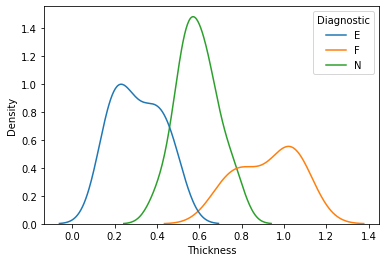

In [4]:
sns.kdeplot(data = data_A, x = 'Thickness', hue = 'Diagnostic')

Bài toán thứ 2: So sánh DmCO giữa 3 phân nhóm Diagnostic, biểu đồ cho thấy DmCO vi phạm giả định phân bố chuẩn:

<AxesSubplot:xlabel='DmCO', ylabel='Density'>

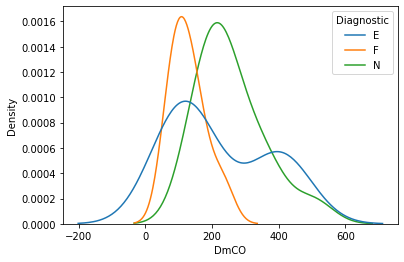

In [5]:
sns.kdeplot(data = data_A, x = 'DmCO', hue = 'Diagnostic')

Bài toán thứ 3: So sánh biến Sepal.Width giữa 3 phân nhóm Species, dữ liệu này thỏa mãn giả định phân bố chuẩn cho một phân tích ANOVA.

In [7]:
data_B = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv', sep = ',', decimal='.', index_col=0)

data_B.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='Sepal.Width', ylabel='Density'>

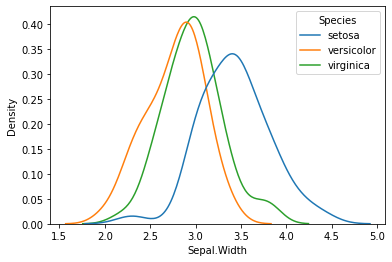

In [8]:
sns.kdeplot(data = data_B, x = 'Sepal.Width', hue = 'Species')

# Triển khai

Sơ đồ UML của hệ thống như sau:

!['uml'](factory_method_uml.png)

Đầu tiên, Nhi tạo Product interface là IANOVA, và 2 product class là KW_test cà ANOVA vận dụng interface này. Cả 2 đều có 1 method là test, với arguments tương tự nhau.

In [11]:
class IANOVA(ABC):
    
    @abstractmethod
    def test(self):
        pass

In [12]:
class ANOVA(IANOVA):
    
    def __init__(self, data:pd.DataFrame, dv:str, bw:str):
        self.name = 'Parametric ANOVA'
        self._data = data
        self._dv = dv
        self._bw = bw
    
    def test(self) -> pd.DataFrame:
        
        return pg.parametric.anova(data = self._data, 
                                   dv = self._dv, 
                                   between = self._bw)

In [13]:
class KW_test(IANOVA):
    
    def __init__(self, data:pd.DataFrame, dv:str, bw:str):
        self.name = 'Kruskal-Wallis test'
        self._data = data
        self._dv = dv
        self._bw = bw
    
    def test(self) -> pd.DataFrame:
        
        return pg.nonparametric.kruskal(data = self._data, 
                                   dv = self._dv, 
                                   between = self._bw)

Tiếp theo, Nhi tạo Creator interface là ICreator, và class Comparison kế thừa ICreator, sau đó override method factory_method để thực hiện việc kiểm tra giả định phân phối, và gọi product tương ứng

In [14]:
class ICreator(ABC):
    
    @abstractmethod
    def factory_method(self):
        pass

In [15]:
class Comparison(ICreator):
    
    def __init__(self, 
                 data: pd.DataFrame, 
                 dv: str, 
                 group: str):
        self._data = data
        self._dv = dv
        self._group = group
    
    def factory_method(self) -> IANOVA:
        
        # Normality check
        nc = pg.normality(data = self._data, 
                          dv = self._dv, 
                          group = self._group)
        
        normality = all(nc.normal.values)
        #Sample_size check
        large_size = all(self._data.groupby(self._group)[self._dv].agg(lambda x: x.shape[0]).values > 10)
        
        if (normality & large_size):
            print('Dữ liệu phân bố chuẩn và đủ lớn, dùng ANOVA')
            return ANOVA(data = self._data, dv = self._dv, bw = self._group)
        else:
            print('Dữ liệu không thỏa giả định ANOVA, dùng Kruskal-Wallis')
            return KW_test(data = self._data, dv = self._dv, bw = self._group)

# Sử dụng

Ta giải quyết bài toán thứ nhất: So sánh Thickness từ dữ liệu data_A

In [16]:
CASE_A = Comparison(data = data_A, dv = 'Thickness', group = 'Diagnostic')

CASE_A.factory_method().test()

Dữ liệu không thỏa giả định ANOVA, dùng Kruskal-Wallis


,Source,ddof1,H,p-unc
Kruskal,Diagnostic,2,31.130711,1.738009e-07


Ta giải quyết bài toán thứ 2: So sánh DmCO từ dữ liệu data_A

In [17]:
CASE_B = Comparison(data = data_A, dv = 'DmCO', group = 'Diagnostic')

CASE_B.factory_method().test()

Dữ liệu không thỏa giả định ANOVA, dùng Kruskal-Wallis


,Source,ddof1,H,p-unc
Kruskal,Diagnostic,2,8.929143,0.01151


Ta giải quyết bài toán thứ 3, cho dữ liệu data_B (iris):

In [18]:
CASE_C = Comparison(data = data_B, dv = 'Sepal.Width', group = 'Species')

CASE_C.factory_method().test()

Dữ liệu phân bố chuẩn và đủ lớn, dùng ANOVA


,Source,ddof1,ddof2,F,p-unc,np2
0,Species,2,147,49.16004,4.492017e-17,0.400783


# Ứng dụng

Mẫu thiết kế Factory Method có thể áp dụng trong các hoàn cảnh:

+ Khi ta chưa tiên liệu được về mức độ phụ thuộc (vào thư viện bên ngoài) của các objects tham gia trong quy trình, lúc này việc tách rời phần code sử dụng object và nội dung method sẽ cho phép việc thiết kế và sửa chữa code dễ dàng hơn. 


+ Khi ta muốn đơn giản hóa quá trình sử dụng của người dùng, qua việc họ chỉ tương tác với 1 giao diện, 1 số ít các câu lệnh đơn giản thay vì phải gọi đích danh tên Class và khởi tạo object trực tiếp từ class đó. 


+ Khi ta muốn cung cấp cho người dùng một cấu trúc cho phép mở rộng  được qua việc bổ sung thêm các bộ phận bên trong, một cách độc lập với giao diện bên ngoài.


+ Khi có thể đạt được mục tiêu bằng nhiều phương pháp khác nhau, với khả năng lựa chọn phương pháp phù hợp cho tình huống cụ thể và ta muốn triển khai chúng độc lập với công đoạn sử dụng.


# Ưu và nhược điểm

**Ưu điểm**: 

+ Tách biệt giữa phần code khởi tạo object và phần code sử dụng object được tạo ra. Người dùng không cần phải nắm rõ cấu trúc chương trình và vai trò của từng Product để khởi tạo object trực tiếp, nhưng chỉ cần tương tác với 1 giao diện trừu tượng để nhận kết quả.


+ Tuân thủ quy tắc Single Responsibility, đảm bảo mỗi class, mỗi method chỉ đảm nhận một nhiệm vụ duy nhất, giúp cho việc bảo trì code được dễ dàng hơn.


+ Tuân thủ quy tắc Open/Close: cho phép mở rộng tính năng cho chương trình mà không cần thay đổi nội dung code trong những class đã có.


**Nhược điểm**: 

Cấu trúc chương trình trở nên phức tạp hơn, cần nhiều class thứ cấp (subclass) để triển khai một công đoạn. 